In [13]:
import nb_setup 
import importlib
importlib.reload(nb_setup)
nb_setup.init()

Changed current working directory to: /Users/falconlin/Development/trading
Initialized project with base directory: /Users/falconlin/Development/trading


In [14]:
from constants.coin_names import CoinNames
from settings import DATA_DIR
import pandas as pd

In [20]:
df = pd.read_csv(DATA_DIR / "all.csv", index_col=[0, 1])

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 161336 entries, ('SOL', 'SOL') to ('DYM', 'DYM')
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        161336 non-null  object 
 1   end_time          161336 non-null  object 
 2   interval          161336 non-null  object 
 3   number_of_trades  161336 non-null  int64  
 4   close             161336 non-null  float64
 5   high              161336 non-null  float64
 6   low               161336 non-null  float64
 7   open              161336 non-null  float64
 8   volume            161336 non-null  float64
 9   tic               161336 non-null  int64  
 10  toc               161336 non-null  int64  
 11  pct_change        2880 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 15.1+ MB


In [50]:
# Calculate the percentage change in the 'close' column for each coin
df['pct_change'] = df.groupby(level=0)['close'].pct_change() * 100

# Convert percentage changes to multipliers (1 + percentage change / 100)
df['multiplier'] = 1 + (df['pct_change'] / 100)

# Calculate the cumulative product of the multipliers for each coin
df['accumulated_multiplier'] = df.groupby(level=0)['multiplier'].cumprod()

# The accumulated percentage change is then (accumulated_multiplier - 1) * 100
df['accumulated_pct_change'] = (df['accumulated_multiplier'] - 1) * 100

# You might want to drop the 'multiplier' and 'accumulated_multiplier' columns if they're no longer needed
df.drop(columns=['multiplier', 'accumulated_multiplier'], inplace=True)




In [51]:
df.head()

start_time             end_time interval  \
coin symbol                                                     
SOL  SOL    2024-02-08 00:00:00  2024-02-08-00:14:59      15m   
     SOL    2024-02-08 00:15:00  2024-02-08-00:29:59      15m   
     SOL    2024-02-08 00:30:00  2024-02-08-00:44:59      15m   
     SOL    2024-02-08 00:45:00  2024-02-08-00:59:59      15m   
     SOL    2024-02-08 01:00:00  2024-02-08-01:14:59      15m   

             number_of_trades   close    high     low    open  volume  \
coin symbol                                                             
SOL  SOL                   17  101.41  101.42  100.97  101.19   63.59   
     SOL                   22  102.03  102.03  101.40  101.52   33.99   
     SOL                   17  101.78  102.19  101.78  102.19  683.71   
     SOL                   13  101.99  101.99  101.53  101.79   30.61   
     SOL                   22  101.29  102.00  101.25  102.00  139.06   

                       tic            toc  pct_change  abs_pct_change  \
coin symbol                                                             
SOL  SOL     1707350400000  1707351299999         NaN             NaN   
     SOL     1707351300000  1707352199999    0.611380        0.611380   
     SOL     1707352200000  1707353099999   -0.245026        0.245026   
     SOL     1707353100000  1707353999999    0.206327        0.206327   
     SOL     1707354000000  1707354899999   -0.686342        0.686342   

             accumulated_pct_change  
coin symbol                          
SOL  SOL                        NaN  
     SOL                   0.611380  
     SOL                   0.364856  
     SOL                   0.571936  
     SOL                  -0.118332

/var/folders/xf/2lw3fnvj1td1jv2kmmzt3zw00000gn/T/ipykernel_18540/2720924124.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


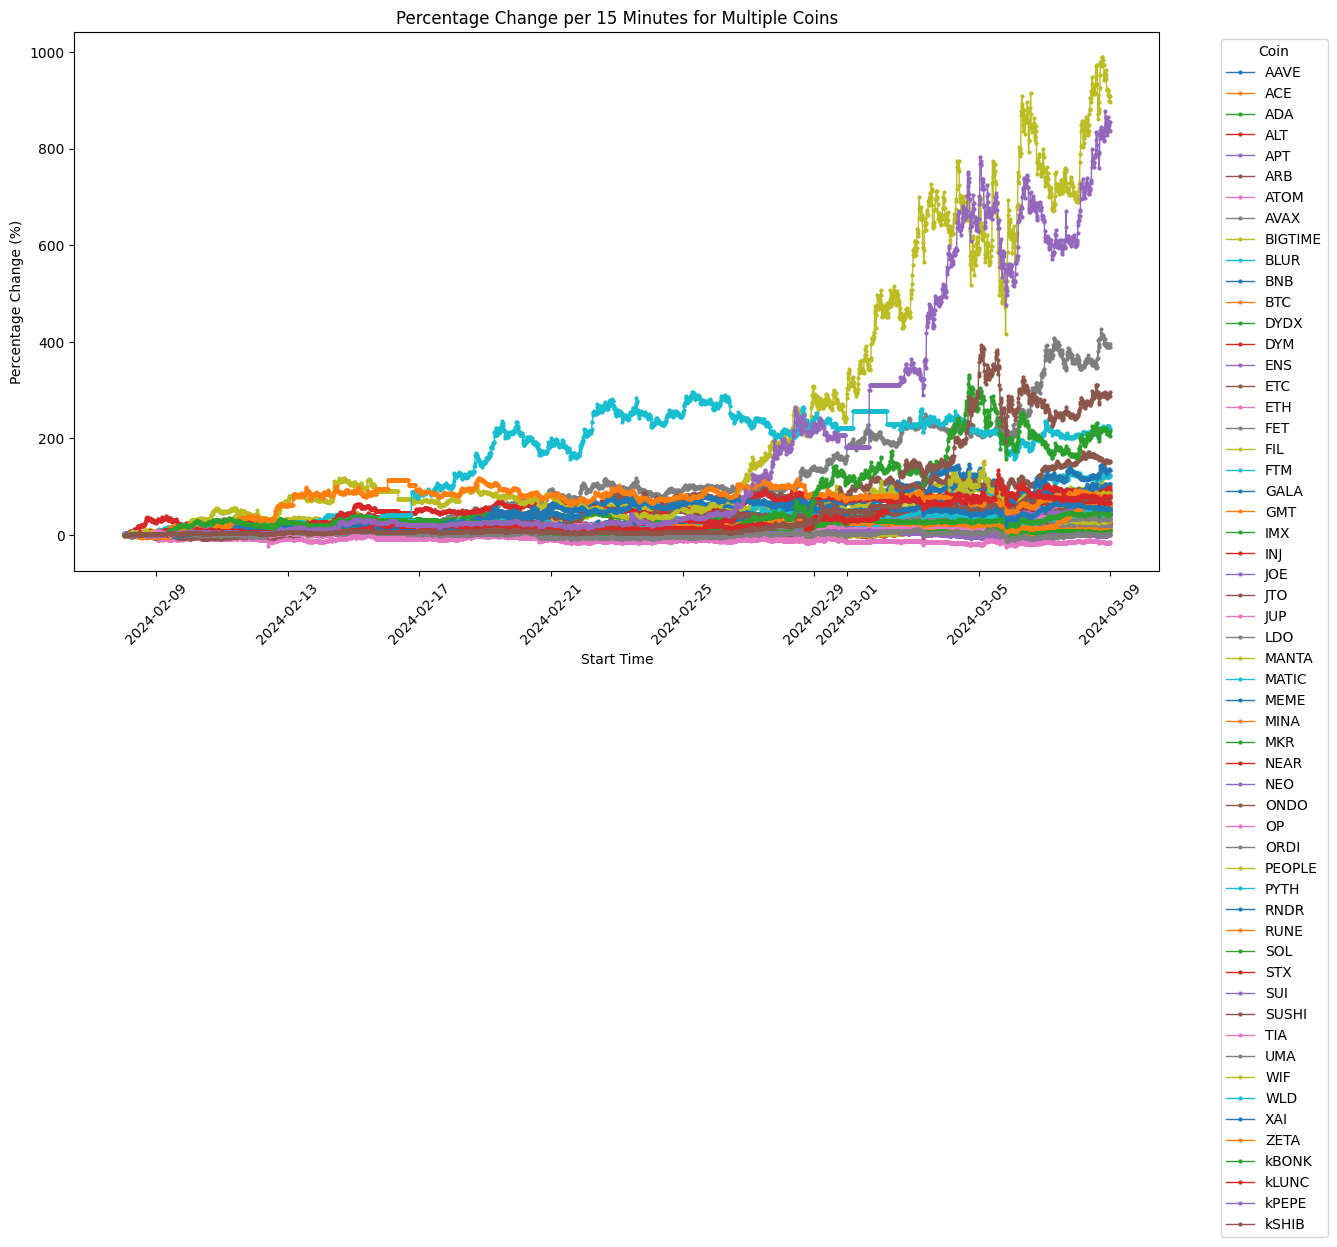

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
# Assuming df is your DataFrame and it includes a 'timestamp' level or column for plotting on the x-axis
# First, ensure your data is sorted by the timestamp if it's not already

def plt1(df):
    chart=100000000

    # Ensure 'start_time' is a datetime column if it's not part of the MultiIndex
    if 'start_time' not in df.index.names:
        df['start_time'] = pd.to_datetime(df['start_time'])

    # If 'start_time' is part of the MultiIndex, you may need to reset the index
    # df.reset_index(inplace=True)
    # df['start_time'] = pd.to_datetime(df['start_time'])

    # Plotting
    plt.figure(figsize=(14, 7))

    # Assuming 'coin' is the first level of the MultiIndex
    for coin, group_df in df.groupby(level=0):
        plt.plot(group_df['start_time'][:chart], group_df['accumulated_pct_change'][:chart], marker='o', linestyle='-', markersize=2, linewidth=1, label=coin)

    plt.title('Percentage Change per 15 Minutes for Multiple Coins')
    plt.xlabel('Start Time')
    plt.ylabel('Percentage Change (%)')
    plt.legend(title='Coin', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plt1(df)

In [58]:
_df = df

_df.groupby(level=0)['accumulated_pct_change'].describe()
# _df['abs_pct_change'] = _df['pct_change'].abs()
# _df.groupby(level=0)['accumulated_pct_change'].max().sort_values(ascending=False)


,count,mean,std,min,25%,50%,75%,max
coin,,,,,,,,
AAVE,2880.0,19.367445,14.359456,0.311575,8.037318,14.290811,29.446182,62.779912
ACE,2880.0,28.404493,17.237098,-1.889342,16.942146,25.171866,42.391072,65.833017
ADA,2880.0,24.044901,14.220648,0.234118,14.855561,19.124241,35.595810,58.184199
ALT,2880.0,41.381578,21.854381,-0.733261,19.714153,49.485785,58.862824,80.624515
APT,2880.0,18.335524,16.987812,-0.657865,4.574376,10.491183,32.606917,65.136572
ARB,2880.0,4.506096,5.093023,-7.821583,0.599831,4.486841,8.011838,20.061304
ATOM,2880.0,13.101034,12.011651,-1.630209,4.329238,7.463058,21.484829,49.499834
AVAX,2880.0,12.936342,6.721408,-0.410358,7.701995,12.893731,18.941559,26.461016
BIGTIME,2880.0,33.626480,14.563796,-0.099372,24.240287,32.791063,40.830555,79.289011
